<a href="https://colab.research.google.com/github/EddyGiusepe/Repasso_Python/blob/main/NumPy_and_SciPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>Funções científicas em NumPy e SciPy</h2>

Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro


A seguir, teremos uma breve visão geral do que o [NumPy](https://machinelearningmastery.com/scientific-functions-in-numpy-and-scipy/?utm_source=drip&utm_medium=email&utm_campaign=Massaging+data+using+pandas&utm_content=Massaging+data+using+pandas) e o [SciPy](https://machinelearningmastery.com/scientific-functions-in-numpy-and-scipy/?utm_source=drip&utm_medium=email&utm_campaign=Massaging+data+using+pandas&utm_content=Massaging+data+using+pandas) fornecem e algumas dicas para usá-los.

Depois de terminar este tutorial, você saberá:

* O que ``NumPy`` e ``SciPy`` fornecem para o seu projeto

* Como acelerar rapidamente o código NumPy usando ``numba``.



# NumPy como uma biblioteca de tensores

Enquanto a ``lista`` e a ``tupla`` em ``Python`` são como gerenciamos arrays nativamente, ``NumPy`` nos fornece os recursos de array mais próximos de C ou Java no sentido de que podemos aplicar todos os elementos do mesmo tipo de dados e, no caso de arrays de alta dimensão, em uma forma regular em cada dimensão. Além disso, realizar a mesma operação no array NumPy geralmente é mais rápido do que no Python nativamente porque o código no NumPy é altamente otimizado.


No exemplo a seguir, plotamos uma ``Elipsóide``.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-2, 2, 100)


In [3]:
x.shape, y.shape

((100,), (100,))

In [4]:
# convert vector into 2D arrays

xx, yy = np.meshgrid(x,y)


In [5]:
xx.shape, yy.shape

((100, 100), (100, 100))

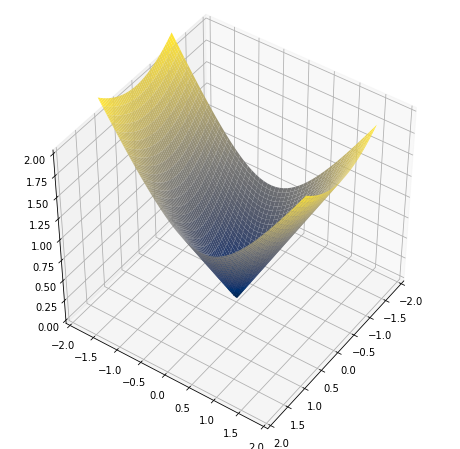

In [6]:
# computation on matching
z = np.sqrt(xx**2 + yy**2)
 
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([0,2])
ax.plot_surface(xx, yy, z, cmap="cividis")
ax.view_init(45, 35)
plt.show()

## NumPy para expandir a Dimensão

Outro recurso interessante no NumPy é uma função para expandir a dimensão. As ``camadas convolucionais`` na rede neural geralmente esperam <font color="yellow">imagens 3D</font>, ou seja, pixels em 2D e os diferentes canais de cores como terceira dimensão. Funciona para imagens coloridas usando ``canais RGB``, mas temos apenas um canal em imagens em tons de cinza. 


``Por exemplo:`` o conjunto de dados de dígitos no scikit-learn:

In [7]:
from sklearn.datasets import load_digits


images = load_digits()["images"]
print(images.shape)

(1797, 8, 8)


Isso mostra que existem $1797$ imagens desse conjunto de dados, e cada uma está em $8×8$ ``pixels``. Este é um conjunto de dados em tons de cinza que mostra que cada pixel é um valor de escuridão. Adicionamos o $4º$ eixo a esta matriz (ou seja, ``convertemos uma matriz 3D em uma matriz 4D``) ​​para que cada imagem fique em 8x8x1 pixels:

In [8]:
# image has axes 0, 1, and 2, adding axis 3

images = np.expand_dims(images, 3)
print(images.shape)

(1797, 8, 8, 1)


Um recurso útil ao trabalhar com o array NumPy é a indexação booleana e a indexação sofisticada. 

``Por exemplo,`` se tivermos um array 2D:

In [9]:
X = np.array([
    [ 1.299,  0.332,  0.594, -0.047,  0.834],
    [ 0.842,  0.441, -0.705, -1.086, -0.252],
    [ 0.785,  0.478, -0.665, -0.532, -0.673],
    [ 0.062,  1.228, -0.333,  0.867,  0.371]
])

In [10]:
X.shape

(4, 5)

Podemos verificar se todos os valores em uma coluna são positivos:

In [11]:
y = (X > 0).all(axis=0)

print(y)

[ True  True False False False]


In [12]:
y.shape

(5,)

Isso mostra que apenas as duas primeiras colunas são todas positivas. Observe que é uma matriz unidimensional de comprimento $5$, que é do mesmo tamanho que o eixo $1$ da matriz $X$. Se usarmos este array booleano como índice no eixo $1$, selecionamos o subarray apenas para onde o índice é positivo:

In [13]:
y = X[: , (X > 0).all(axis=0)]

print(y)

[[1.299 0.332]
 [0.842 0.441]
 [0.785 0.478]
 [0.062 1.228]]


In [14]:
y.shape

(4, 2)

Se uma lista de inteiros for usada no lugar da matriz booleana acima, selecionamos de $X$ acordo com o índice correspondente à lista. O ``NumPy`` chama isso de indexação sofisticada. Então, abaixo, podemos selecionar as duas primeiras colunas duas vezes e formar um novo array:

In [15]:
y = X[: , [0, 1, 1, 0]]

print(y)

[[1.299 0.332 0.332 1.299]
 [0.842 0.441 0.441 0.842]
 [0.785 0.478 0.478 0.785]
 [0.062 1.228 1.228 0.062]]


# Funções do SciPy

<font color="orange">SciPy</font> é um projeto irmão do NumPy. Portanto, você verá principalmente funções SciPy esperando arrays NumPy como argumentos ou retornando um. O SciPy fornece muito mais funções que são menos usadas ou mais avançadas.


As ``funções do SciPy`` são organizadas em submódulos. Alguns submódulos comuns são:

* ``scipy.cluster.hierarchy:`` Agrupamento hierárquico
* ``scipy.fft:`` Transformação rápida de Fourier
* ``scipy.integrate:`` Integração numérica
* ``scipy.interpolate:`` Funções de interpolação e spline
* ``scipy.linalg:`` Álgebra Linear
* ``scipy.optimize:`` Otimização numérica
* ``scipy.signal:`` Processamento de sinal
* ``scipy.sparse:`` Representação de matriz esparsa
* ``scipy.special:`` Algumas funções matemáticas exóticas
* ``scipy.stats:`` Estatísticas, incluindo distribuições de probabilidade


Mas nunca assuma que o SciPy pode cobrir tudo. Para análise de séries temporais, ``por exemplo``, é melhor depender do módulo ``statsmodels``.

Cobrimos muitos exemplos usando  ``scipy.optimize`` em outros posts. É uma ótima ferramenta para encontrar o mínimo de uma função usando, por exemplo, o método de Newton. Tanto o NumPy quanto o SciPy têm o ``linalg`` submódulo para álgebra linear, mas os do SciPy são mais avançados, como a função para fazer decomposição ``QR`` ou exponenciais de matriz.

Talvez o recurso mais usado do SciPy seja o módulo ``stats``. Tanto no NumPy quanto no SciPy, podemos gerar números aleatórios gaussianos multivariados com correlação diferente de zero.

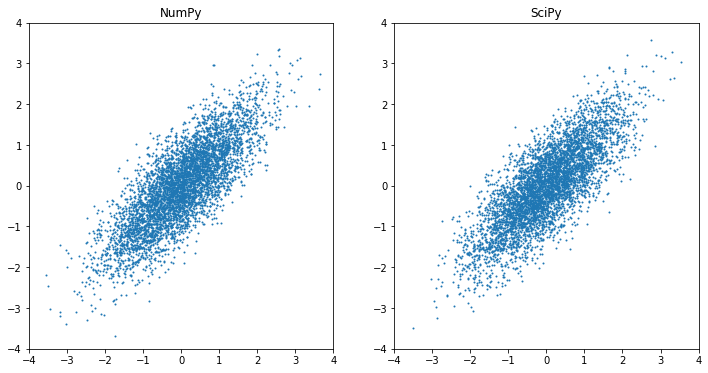

In [17]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
 


mean = [0, 0]             # zero mean
cov = [[1, 0.8],[0.8, 1]] # covariance matrix
X1 = np.random.default_rng().multivariate_normal(mean, cov, 5000) # Com NumPy
X2 = multivariate_normal.rvs(mean, cov, 5000) # Com sciPy
 
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(121)
ax.scatter(X1[:,0], X1[:,1], s=1)
ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
ax.set_title("NumPy")
 
ax = plt.subplot(122)
ax.scatter(X2[:,0], X2[:,1], s=1)
ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
ax.set_title("SciPy")
 
plt.show()

Mas se quisermos fazer referência à própria função de distribuição, é melhor depender do ``SciPy``. Por exemplo, a famosa regra $68-95-99.7$ está se referindo à distribuição normal padrão, e podemos obter a porcentagem exata das funções de distribuição cumulativa do SciPy:

In [18]:
from scipy.stats import norm


n = norm.cdf([1,2,3,-1,-2,-3])
print(n)
print(n[:3] - n[-3:])

[0.84134475 0.97724987 0.9986501  0.15865525 0.02275013 0.0013499 ]
[0.68268949 0.95449974 0.9973002 ]


Assim, vemos que esperamos uma probabilidade de $68,269\%$ de que os valores estejam dentro de um desvio padrão da média em uma distribuição normal. Por outro lado, temos a função de ponto percentual como a função inversa da função de distribuição cumulativa:

In [19]:
print(norm.ppf(0.99))

2.3263478740408408


Portanto, isso significa que, se os valores estiverem em uma distribuição normal, esperamos uma probabilidade de $99\%$ (probabilidade unicaudal) de que o valor não seja superior a $2,32$ desvios padrão além da média.

Estes são exemplos de como o ``SciPy`` pode oferecer uma milha extra em relação ao que o ``NumPy`` oferece.

# Acelerando com numba

O ``NumPy`` é mais rápido que o Python nativo porque muitas das operações são implementadas em ``C`` e usam algoritmos otimizados. Mas há momentos em que queremos fazer algo, mas o ``NumPy`` ainda é muito lento.

Pode ajudar se você pedir ``numba`` para otimizá-lo ainda mais ``paralelizando`` ou ``movendo a operação para a GPU``, se você tiver uma. Você precisa instalar o ``numba`` módulo primeiro.

E pode demorar um pouco se você precisar compilar ``numba`` em um módulo Python. Depois, se você tiver uma função que é puramente operações ``NumPy``, você pode adicionar o numba decorador para acelerá-la.

In [20]:
import numba

In [ ]:
# Assi:


# @numba.jit(nopython=True)
# def numpy_only_function(...)

O que ele faz é usar um compilador ``just-in-time`` para vetorizar a operação para que ela possa ser executada mais rapidamente. Você pode ver a melhor melhoria de desempenho se sua função estiver sendo executada muitas vezes em seu programa (**por exemplo**, a função de atualização em ``gradiente descendente``) porque a sobrecarga de execução do compilador pode ser amortizada.

``Por exemplo:`` abaixo está uma implementação do algoritmo ``t-SNE`` para transformar dados de <font color="orange">$784$ dimensões em $2$ dimensões</font>. Não vamos explicar o algoritmo t-SNE em detalhes, mas ele precisa de muitas iterações para convergir. O código a seguir mostra como podemos usar ``numba`` para otimizar as funções de loop interno (e também demonstra o uso do NumPy). Leva alguns minutos para terminar. Você pode tentar remover os <font color="orange">@numba.jit</font> decoradores depois. Levará um tempo consideravelmente maior.

11501568/11490434 [==============================] - 0s 0us/step
2022-04-24 00:07:00.990757 - Iteration 0: Error = 50.862443594287214
2022-04-24 00:07:11.876962 - Iteration 50: Error = 50.862443287311216
2022-04-24 00:07:22.714667 - Iteration 100: Error = 1.8287677508739477
2022-04-24 00:07:33.691075 - Iteration 150: Error = 1.826582513777536
2022-04-24 00:07:44.569673 - Iteration 200: Error = 0.7599140598221841
2022-04-24 00:07:55.500350 - Iteration 250: Error = 0.6984134494367565
2022-04-24 00:08:06.512552 - Iteration 300: Error = 0.6722525911992032
2022-04-24 00:08:17.384054 - Iteration 350: Error = 0.6524427071659807
2022-04-24 00:08:28.423146 - Iteration 400: Error = 0.6459794667034027
2022-04-24 00:08:39.402326 - Iteration 450: Error = 0.6411808486834654


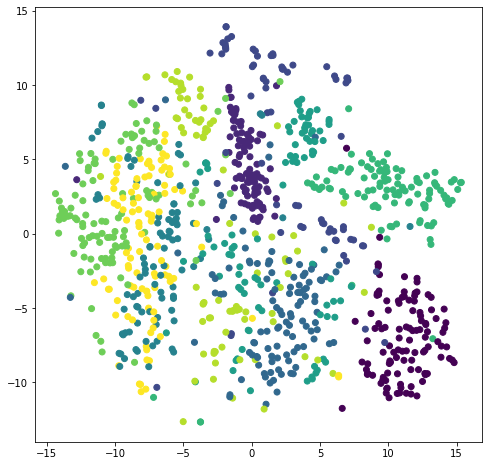

In [22]:
import datetime
 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import numba
 
def tSNE(X, ndims=2, perplexity=30, seed=0, max_iter=500, stop_lying_iter=100, mom_switch_iter=400):
    """The t-SNE algorithm
 
	Args:
		X: the high-dimensional coordinates
		ndims: number of dimensions in output domain
    Returns:
        Points of X in low dimension
    """
    momentum = 0.5
    final_momentum = 0.8
    eta = 200.0
    N, _D = X.shape
    np.random.seed(seed)
 
    # normalize input
    X -= X.mean(axis=0) # zero mean
    X /= np.abs(X).max() # min-max scaled
 
    # compute input similarity for exact t-SNE
    P = computeGaussianPerplexity(X, perplexity)
    # symmetrize and normalize input similarities
    P = P + P.T
    P /= P.sum()
    # lie about the P-values
    P *= 12.0
    # initialize solution
    Y = np.random.randn(N, ndims) * 0.0001
    # perform main training loop
    gains = np.ones_like(Y)
    uY = np.zeros_like(Y)
    for i in range(max_iter):
        # compute gradient, update gains
        dY = computeExactGradient(P, Y)
        gains = np.where(np.sign(dY) != np.sign(uY), gains+0.2, gains*0.8).clip(0.1)
        # gradient update with momentum and gains
        uY = momentum * uY - eta * gains * dY
        Y = Y + uY
        # make the solution zero-mean
        Y -= Y.mean(axis=0)
        # Stop lying about the P-values after a while, and switch momentum
        if i == stop_lying_iter:
            P /= 12.0
        if i == mom_switch_iter:
            momentum = final_momentum
        # print progress
        if (i % 50) == 0:
            C = evaluateError(P, Y)
            now = datetime.datetime.now()
            print(f"{now} - Iteration {i}: Error = {C}")
    return Y
 
@numba.jit(nopython=True)
def computeExactGradient(P, Y):
    """Gradient of t-SNE cost function
 
	Args:
        P: similarity matrix
        Y: low-dimensional coordinates
    Returns:
        dY, a numpy array of shape (N,D)
	"""
    N, _D = Y.shape
    # compute squared Euclidean distance matrix of Y, the Q matrix, and the normalization sum
    DD = computeSquaredEuclideanDistance(Y)
    Q = 1/(1+DD)
    sum_Q = Q.sum()
    # compute gradient
    mult = (P - (Q/sum_Q)) * Q
    dY = np.zeros_like(Y)
    for n in range(N):
        for m in range(N):
            if n==m: continue
            dY[n] += (Y[n] - Y[m]) * mult[n,m]
    return dY
 
@numba.jit(nopython=True)
def evaluateError(P, Y):
    """Evaluate t-SNE cost function
 
    Args:
        P: similarity matrix
        Y: low-dimensional coordinates
    Returns:
        Total t-SNE error C
    """
    DD = computeSquaredEuclideanDistance(Y)
    # Compute Q-matrix and normalization sum
    Q = 1/(1+DD)
    np.fill_diagonal(Q, np.finfo(np.float32).eps)
    Q /= Q.sum()
    # Sum t-SNE error: sum P log(P/Q)
    error = P * np.log( (P + np.finfo(np.float32).eps) / (Q + np.finfo(np.float32).eps) )
    return error.sum()
 
@numba.jit(nopython=True)
def computeGaussianPerplexity(X, perplexity):
    """Compute Gaussian Perplexity
 
    Args:
        X: numpy array of shape (N,D)
        perplexity: double
    Returns:
        Similarity matrix P
    """
    # Compute the squared Euclidean distance matrix
    N, _D = X.shape
    DD = computeSquaredEuclideanDistance(X)
    # Compute the Gaussian kernel row by row
    P = np.zeros_like(DD)
    for n in range(N):
        found = False
        beta = 1.0
        min_beta = -np.inf
        max_beta = np.inf
        tol = 1e-5
 
        # iterate until we get a good perplexity
        n_iter = 0
        while not found and n_iter < 200:
            # compute Gaussian kernel row
            P[n] = np.exp(-beta * DD[n])
            P[n,n] = np.finfo(np.float32).eps
            # compute entropy of current row
            # Gaussians to be row-normalized to make it a probability
            # then H = sum_i -P[i] log(P[i])
            #        = sum_i -P[i] (-beta * DD[n] - log(sum_P))
            #        = sum_i P[i] * beta * DD[n] + log(sum_P)
            sum_P = P[n].sum()
            H = beta * (DD[n] @ P[n]) / sum_P + np.log(sum_P)
            # Evaluate if entropy within tolerance level
            Hdiff = H - np.log2(perplexity)
            if -tol < Hdiff < tol:
                found = True
                break
            if Hdiff > 0:
                min_beta = beta
                if max_beta in (np.inf, -np.inf):
                    beta *= 2
                else:
                    beta = (beta + max_beta) / 2
            else:
                max_beta = beta
                if min_beta in (np.inf, -np.inf):
                    beta /= 2
                else:
                    beta = (beta + min_beta) / 2
            n_iter += 1
        # normalize this row
        P[n] /= P[n].sum()
    assert not np.isnan(P).any()
    return P
 
@numba.jit(nopython=True)
def computeSquaredEuclideanDistance(X):
    """Compute squared distance
    Args:
        X: numpy array of shape (N,D)
    Returns:
        numpy array of shape (N,N) of squared distances
    """
    N, _D = X.shape
    DD = np.zeros((N,N))
    for i in range(N-1):
        for j in range(i+1, N):
            diff = X[i] - X[j]
            DD[j][i] = DD[i][j] = diff @ diff
    return DD
 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# pick 1000 samples from the dataset
rows = np.random.choice(X_test.shape[0], 1000, replace=False)
X_data = X_train[rows].reshape(1000, -1).astype("float")
X_label = y_train[rows]
# run t-SNE to transform into 2D and visualize in scatter plot
Y = tSNE(X_data, 2, 30, 0, 500, 100, 400)
plt.figure(figsize=(8,8))
plt.scatter(Y[:,0], Y[:,1], c=X_label)
plt.show()

OBS:

Este script foi baseado no [Machine Learning Mastery  -  PhD.:Jason Brownlee](https://machinelearningmastery.com/scientific-functions-in-numpy-and-scipy/?utm_source=drip&utm_medium=email&utm_campaign=Massaging+data+using+pandas&utm_content=Massaging+data+using+pandas).